Import required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix

Load the dataset


In [3]:

# load dataset
(X_train, y_train), (x_test, y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


170500096/170498071 [==============================] - 6s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


Visualize some images


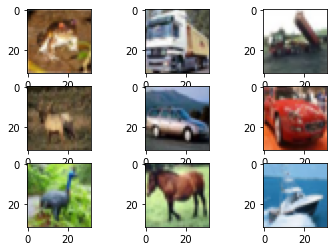

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

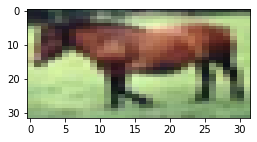

In [ ]:
fig = plt.figure()
fig.set_size_inches(4,2)
plt.plot(337)
plt.imshow(X_train[7],aspect='auto')
plt.show()


Split the dataset to train and test


In [4]:
x_train=X_train.reshape((X_train.shape[0],-1))

In [5]:
x_test=x_test.reshape((x_test.shape[0],-1))

In [ ]:
x_train.shape,x_test.shape

((50000, 3072), (10000, 3072))

In [6]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

Normalization

In [7]:
x_train= x_train.astype('float32') / 255


In [8]:
x_test= x_test.astype('float32') / 255

For Visualization

In [9]:
import matplotlib.pyplot as plt
def plot_history(history, title):
    plt.figure(figsize=(13,4))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

For confusion matrix 

In [98]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Build a basic  ANN model with SGD optimizer


Model 1 by using activation functon as sigmoid and optimizer as SGD

Epoch 1/10
100/100 [==============================] - 1s 9ms/step - loss: 2.3867 - accuracy: 0.1013 - val_loss: 2.3463 - val_accuracy: 0.1000
Epoch 2/10
100/100 [==============================] - 1s 7ms/step - loss: 2.3398 - accuracy: 0.0997 - val_loss: 2.3207 - val_accuracy: 0.0974
Epoch 3/10
100/100 [==============================] - 1s 7ms/step - loss: 2.3144 - accuracy: 0.1011 - val_loss: 2.3088 - val_accuracy: 0.0964
Epoch 4/10
100/100 [==============================] - 1s 7ms/step - loss: 2.3073 - accuracy: 0.0993 - val_loss: 2.3030 - val_accuracy: 0.1075
Epoch 5/10
100/100 [==============================] - 1s 7ms/step - loss: 2.3024 - accuracy: 0.1130 - val_loss: 2.3000 - val_accuracy: 0.1252
Epoch 6/10
100/100 [==============================] - 1s 8ms/step - loss: 2.2995 - accuracy: 0.1289 - val_loss: 2.2981 - val_accuracy: 0.1375
Epoch 7/10
100/100 [==============================] - 1s 8ms/step - loss: 2.2982 - accuracy: 0.1423 - val_loss: 2.2968 - val_accuracy: 0.1450
Epoch 

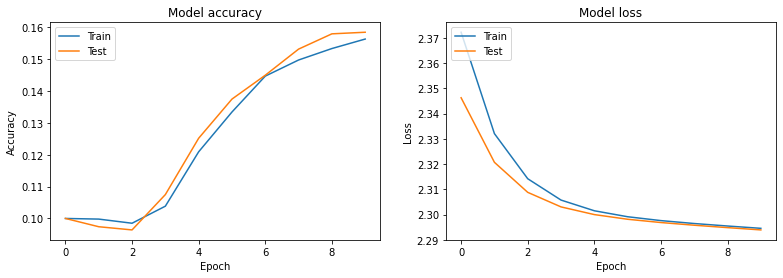

In [11]:
model1=Sequential()
model1.add(Dense(256,input_shape=(3072,),activation='sigmoid'))
model1.add(Dense(128,activation='sigmoid'))
model1.add(Dense(10,activation='softmax'))
sgd=optimizers.SGD(lr=0.001)
model1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model1_history=model1.fit(x_train,y_train,batch_size=500,epochs=10,verbose=1,validation_data=(x_test, y_test))
plot_history(model1_history, 'Simple NN with 500 batch size')

Model 2 by using activation function as relu and optimizer as adam with learning rate 0.001

Epoch 1/10
100/100 [==============================] - 2s 17ms/step - loss: 3.1780 - accuracy: 0.1762 - val_loss: 1.8880 - val_accuracy: 0.3174
Epoch 2/10
100/100 [==============================] - 1s 15ms/step - loss: 1.8538 - accuracy: 0.3394 - val_loss: 1.7504 - val_accuracy: 0.3776
Epoch 3/10
100/100 [==============================] - 1s 15ms/step - loss: 1.7431 - accuracy: 0.3811 - val_loss: 1.6615 - val_accuracy: 0.4046
Epoch 4/10
100/100 [==============================] - 1s 15ms/step - loss: 1.6537 - accuracy: 0.4143 - val_loss: 1.6060 - val_accuracy: 0.4286
Epoch 5/10
100/100 [==============================] - 1s 15ms/step - loss: 1.5905 - accuracy: 0.4375 - val_loss: 1.5667 - val_accuracy: 0.4429
Epoch 6/10
100/100 [==============================] - 1s 15ms/step - loss: 1.5426 - accuracy: 0.4544 - val_loss: 1.5649 - val_accuracy: 0.4437
Epoch 7/10
100/100 [==============================] - 1s 15ms/step - loss: 1.5237 - accuracy: 0.4636 - val_loss: 1.5341 - val_accuracy: 0.4532

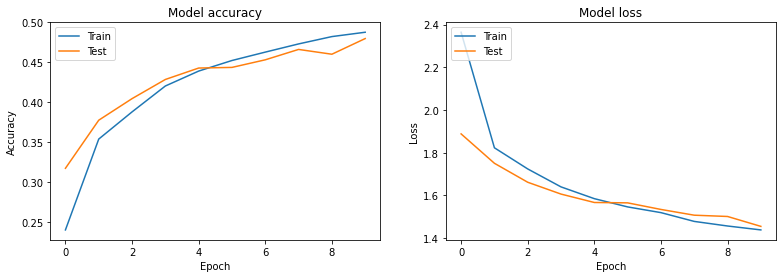

In [12]:
model2=Sequential()
model2.add(Dense(2000,input_shape=(3072,),activation='relu'))
model2.add(Dense(500,activation='relu'))
model2.add(Dense(10,activation='softmax'))
adam=optimizers.Adam(lr=0.001)
model2.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model2_history=model2.fit(x_train,y_train,batch_size=500,epochs=10,verbose=1,validation_data=(x_test, y_test))
plot_history(model2_history, 'Simple NN with 500 batch size')

Model 3 Elu activate function with RMSprop optimizer

Epoch 1/10
100/100 [==============================] - 2s 10ms/step - loss: 3.3012 - accuracy: 0.1403 - val_loss: 2.0234 - val_accuracy: 0.2667
Epoch 2/10
100/100 [==============================] - 1s 9ms/step - loss: 2.1050 - accuracy: 0.2340 - val_loss: 1.9573 - val_accuracy: 0.2904
Epoch 3/10
100/100 [==============================] - 1s 9ms/step - loss: 1.9822 - accuracy: 0.2835 - val_loss: 2.0540 - val_accuracy: 0.2554
Epoch 4/10
100/100 [==============================] - 1s 9ms/step - loss: 1.8825 - accuracy: 0.3222 - val_loss: 1.9089 - val_accuracy: 0.3220
Epoch 5/10
100/100 [==============================] - 1s 9ms/step - loss: 1.8223 - accuracy: 0.3478 - val_loss: 1.7516 - val_accuracy: 0.3712
Epoch 6/10
100/100 [==============================] - 1s 9ms/step - loss: 1.7589 - accuracy: 0.3694 - val_loss: 1.6964 - val_accuracy: 0.3701
Epoch 7/10
100/100 [==============================] - 1s 9ms/step - loss: 1.7150 - accuracy: 0.3843 - val_loss: 1.6208 - val_accuracy: 0.4171
Epoch

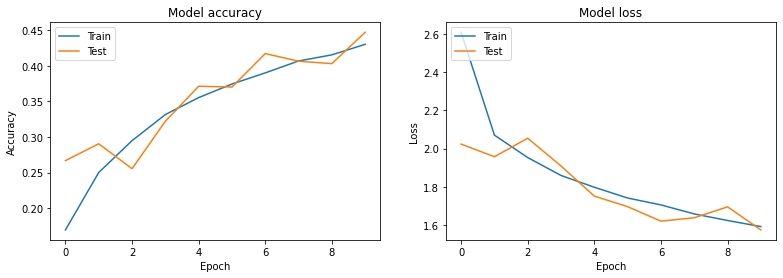

In [13]:
model3=Sequential()
model3.add(Dense(256,input_shape=(3072,),activation='elu'))
model3.add(Dense(128,activation='elu'))
model3.add(Dense(64,activation='elu'))
model3.add(Dense(10,activation='softmax'))
rmsprop=optimizers.RMSprop()
model3.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])
model3_history=model3.fit(x_train,y_train,batch_size=500,epochs=10,verbose=1,validation_data=(x_test, y_test))
plot_history(model3_history, 'Simple NN with 500 batch size')

It's not easy to tell if it improves accuracy. It seems that validation accuracy doesn't diverge from the training accuracy so if the model was left training for more epochs it could give out better results

Model 4 by using comibination of relu and selu activation function with adagrad optimizer

Epoch 1/10
100/100 [==============================] - 1s 9ms/step - loss: 2.2948 - accuracy: 0.1608 - val_loss: 2.1093 - val_accuracy: 0.2554
Epoch 2/10
100/100 [==============================] - 1s 8ms/step - loss: 2.0828 - accuracy: 0.2636 - val_loss: 2.0106 - val_accuracy: 0.3007
Epoch 3/10
100/100 [==============================] - 1s 8ms/step - loss: 1.9847 - accuracy: 0.3078 - val_loss: 1.9452 - val_accuracy: 0.3243
Epoch 4/10
100/100 [==============================] - 1s 8ms/step - loss: 1.9337 - accuracy: 0.3240 - val_loss: 1.9046 - val_accuracy: 0.3409
Epoch 5/10
100/100 [==============================] - 1s 8ms/step - loss: 1.8933 - accuracy: 0.3395 - val_loss: 1.8738 - val_accuracy: 0.3483
Epoch 6/10
100/100 [==============================] - 1s 8ms/step - loss: 1.8653 - accuracy: 0.3487 - val_loss: 1.8542 - val_accuracy: 0.3535
Epoch 7/10
100/100 [==============================] - 1s 8ms/step - loss: 1.8479 - accuracy: 0.3571 - val_loss: 1.8366 - val_accuracy: 0.3595
Epoch 

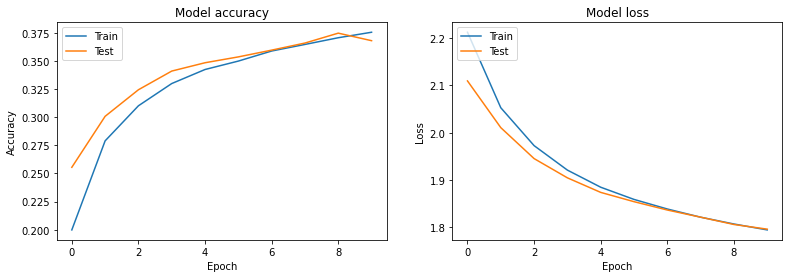

In [14]:
model4=Sequential()
model4.add(Dense(256,input_shape=(3072,),activation='selu'))
model4.add(Dense(128,activation='selu'))
model4.add(Dense(64,activation='relu'))
model4.add(Dense(10,activation='softmax'))
adagrad=optimizers.Adagrad()
model4.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy'])
model4_history=model4.fit(x_train,y_train,batch_size=500,epochs=10,verbose=1,validation_data=(x_test, y_test))
plot_history(model4_history, 'Simple NN with 500 batch size')

Model 5 by using comibination of relu and selu activation function with adam optimizer

Epoch 1/25
500/500 [==============================] - 5s 8ms/step - loss: 2.4485 - accuracy: 0.2432 - val_loss: 1.7923 - val_accuracy: 0.3677
Epoch 2/25
500/500 [==============================] - 4s 8ms/step - loss: 1.7036 - accuracy: 0.3827 - val_loss: 1.5808 - val_accuracy: 0.4340
Epoch 3/25
500/500 [==============================] - 4s 8ms/step - loss: 1.6114 - accuracy: 0.4217 - val_loss: 1.5229 - val_accuracy: 0.4519
Epoch 4/25
500/500 [==============================] - 4s 8ms/step - loss: 1.5445 - accuracy: 0.4401 - val_loss: 1.5469 - val_accuracy: 0.4432
Epoch 5/25
500/500 [==============================] - 4s 7ms/step - loss: 1.4908 - accuracy: 0.4629 - val_loss: 1.5019 - val_accuracy: 0.4595
Epoch 6/25
500/500 [==============================] - 4s 7ms/step - loss: 1.4474 - accuracy: 0.4792 - val_loss: 1.4850 - val_accuracy: 0.4648
Epoch 7/25
500/500 [==============================] - 4s 7ms/step - loss: 1.4237 - accuracy: 0.4885 - val_loss: 1.4228 - val_accuracy: 0.4958
Epoch 

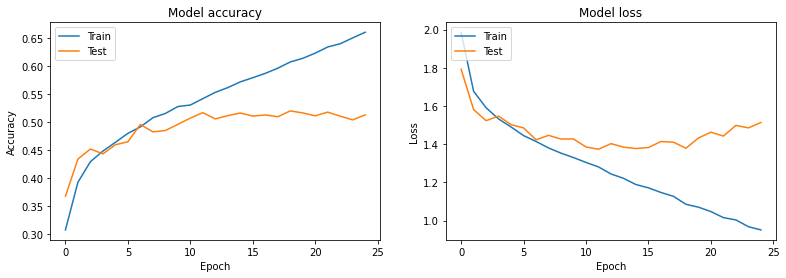

In [15]:
model5=Sequential()
model5.add(Dense(1028,input_shape=(3072,),activation='relu'))
model5.add(Dense(512,activation='relu'))
model5.add(Dense(256,activation='selu'))
model5.add(Dense(128,activation='selu'))
model5.add(Dense(10,activation='softmax'))
adam=optimizers.Adam()
model5.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model5_history=model5.fit(x_train,y_train,batch_size=100,epochs=25,verbose=1,validation_data=(x_test, y_test))
plot_history(model5_history, 'Simple NN with 500 batch size')

Model 6 here I changed order of activation functions and model is using adagrad optimizer.Here model has default learning rate

Epoch 1/50
500/500 [==============================] - 3s 5ms/step - loss: 2.1378 - accuracy: 0.2286 - val_loss: 1.9010 - val_accuracy: 0.3283
Epoch 2/50
500/500 [==============================] - 3s 5ms/step - loss: 1.8719 - accuracy: 0.3368 - val_loss: 1.8024 - val_accuracy: 0.3669
Epoch 3/50
500/500 [==============================] - 3s 5ms/step - loss: 1.7883 - accuracy: 0.3731 - val_loss: 1.7586 - val_accuracy: 0.3839
Epoch 4/50
500/500 [==============================] - 3s 5ms/step - loss: 1.7427 - accuracy: 0.3934 - val_loss: 1.7249 - val_accuracy: 0.3909
Epoch 5/50
500/500 [==============================] - 3s 5ms/step - loss: 1.7009 - accuracy: 0.4060 - val_loss: 1.7098 - val_accuracy: 0.3969
Epoch 6/50
500/500 [==============================] - 3s 5ms/step - loss: 1.6810 - accuracy: 0.4115 - val_loss: 1.6727 - val_accuracy: 0.4065
Epoch 7/50
500/500 [==============================] - 3s 5ms/step - loss: 1.6592 - accuracy: 0.4170 - val_loss: 1.6599 - val_accuracy: 0.4115
Epoch 

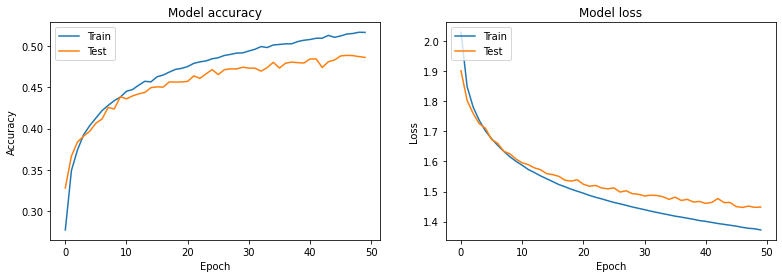

In [16]:
model6=Sequential()
model6.add(Dense(256,input_shape=(3072,),activation='elu'))
model6.add(Dense(128,activation='selu'))
model6.add(Dense(64,activation='relu'))
model6.add(Dense(64,activation='elu'))
model6.add(Dense(32,activation='selu'))
model6.add(Dense(10,activation='softmax'))
adagrad=optimizers.Adagrad()
model6.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy'])
model6_history=model6.fit(x_train,y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_test, y_test))
plot_history(model6_history, 'Simple NN with 500 batch size')

Model 7

Epoch 1/50
500/500 [==============================] - 3s 6ms/step - loss: 2.1391 - accuracy: 0.2110 - val_loss: 1.9250 - val_accuracy: 0.3043
Epoch 2/50
500/500 [==============================] - 3s 5ms/step - loss: 1.8878 - accuracy: 0.3229 - val_loss: 1.8256 - val_accuracy: 0.3487
Epoch 3/50
500/500 [==============================] - 3s 5ms/step - loss: 1.8211 - accuracy: 0.3500 - val_loss: 1.7841 - val_accuracy: 0.3631
Epoch 4/50
500/500 [==============================] - 3s 5ms/step - loss: 1.7725 - accuracy: 0.3711 - val_loss: 1.7381 - val_accuracy: 0.3813
Epoch 5/50
500/500 [==============================] - 3s 5ms/step - loss: 1.7336 - accuracy: 0.3840 - val_loss: 1.7083 - val_accuracy: 0.3878
Epoch 6/50
500/500 [==============================] - 3s 5ms/step - loss: 1.6960 - accuracy: 0.3967 - val_loss: 1.6857 - val_accuracy: 0.3986
Epoch 7/50
500/500 [==============================] - 3s 5ms/step - loss: 1.6849 - accuracy: 0.4069 - val_loss: 1.6639 - val_accuracy: 0.4117
Epoch 

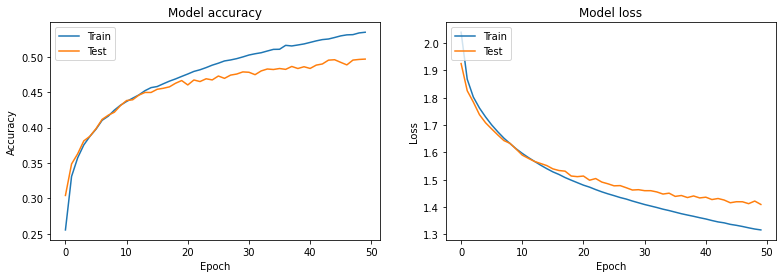

In [17]:
model7=Sequential()
model7.add(Dense(256,input_shape=(3072,),activation='relu'))
model7.add(Dense(128,activation='selu'))
model7.add(Dense(64,activation='relu'))
model7.add(Dense(64,activation='selu'))
model7.add(Dense(32,activation='relu'))
model7.add(Dense(32,activation='selu'))
model7.add(Dense(10,activation='softmax'))
adagrad=optimizers.Adagrad()
model7.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy'])
model7_history=model7.fit(x_train,y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_test, y_test))
plot_history(model7_history, 'Simple NN with 500 batch size')


Model 8

Epoch 1/50
500/500 [==============================] - 3s 6ms/step - loss: 2.0940 - accuracy: 0.2378 - val_loss: 1.8036 - val_accuracy: 0.3506
Epoch 2/50
500/500 [==============================] - 3s 5ms/step - loss: 1.7448 - accuracy: 0.3675 - val_loss: 1.6521 - val_accuracy: 0.4128
Epoch 3/50
500/500 [==============================] - 3s 5ms/step - loss: 1.6479 - accuracy: 0.4028 - val_loss: 1.5776 - val_accuracy: 0.4373
Epoch 4/50
500/500 [==============================] - 3s 5ms/step - loss: 1.5825 - accuracy: 0.4300 - val_loss: 1.5159 - val_accuracy: 0.4555
Epoch 5/50
500/500 [==============================] - 3s 5ms/step - loss: 1.5284 - accuracy: 0.4472 - val_loss: 1.5504 - val_accuracy: 0.4477
Epoch 6/50
500/500 [==============================] - 3s 5ms/step - loss: 1.4942 - accuracy: 0.4625 - val_loss: 1.4948 - val_accuracy: 0.4717
Epoch 7/50
500/500 [==============================] - 3s 5ms/step - loss: 1.4682 - accuracy: 0.4737 - val_loss: 1.4813 - val_accuracy: 0.4722
Epoch 

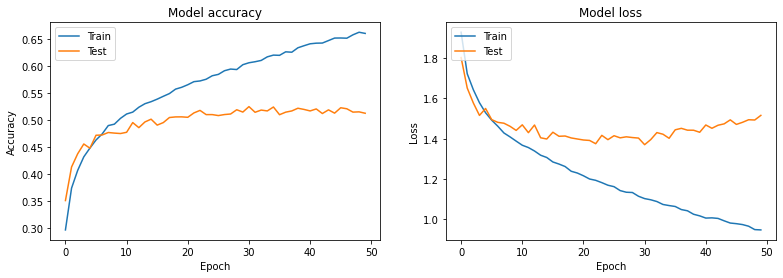

In [18]:
model8=Sequential()
model8.add(Dense(256,input_shape=(3072,),activation='relu'))
model8.add(Dense(128,activation='selu'))
model8.add(Dense(64,activation='relu'))
model8.add(Dense(64,activation='selu'))
model8.add(Dense(32,activation='relu'))
model8.add(Dense(32,activation='selu'))
model8.add(Dense(10,activation='softmax'))
adagrad=optimizers.Adam()
model8.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy'])
model8_history=model8.fit(x_train,y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_test, y_test))
plot_history(model8_history, 'Simple NN with 500 batch size')

Model 9

Epoch 1/50
1000/1000 [==============================] - 5s 4ms/step - loss: 2.2757 - accuracy: 0.1689 - val_loss: 2.0487 - val_accuracy: 0.2636
Epoch 2/50
1000/1000 [==============================] - 4s 4ms/step - loss: 2.0229 - accuracy: 0.2755 - val_loss: 1.9741 - val_accuracy: 0.2950
Epoch 3/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9628 - accuracy: 0.3035 - val_loss: 1.9345 - val_accuracy: 0.3154
Epoch 4/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9257 - accuracy: 0.3194 - val_loss: 1.9076 - val_accuracy: 0.3247
Epoch 5/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8987 - accuracy: 0.3310 - val_loss: 1.8883 - val_accuracy: 0.3300
Epoch 6/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8782 - accuracy: 0.3383 - val_loss: 1.8724 - val_accuracy: 0.3377
Epoch 7/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8723 - accuracy: 0.3417 - val_loss: 1.8600 - val_accuracy:

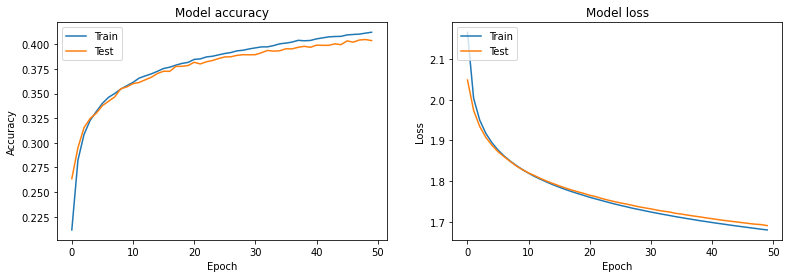

In [19]:
model9=Sequential()
model9.add(Dense(256,input_shape=(3072,),activation='relu'))
model9.add(Dense(128,activation='selu'))
model9.add(Dense(64,activation='selu'))
model9.add(Dense(32,activation='selu'))
model9.add(Dense(10,activation='softmax'))
adagrad=optimizers.Adagrad(lr=0.0001)
model9.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy'])
model9_history=model9.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_test, y_test))
plot_history(model9_history, 'Simple NN with 500 batch size')

Model 10


Epoch 1/50
500/500 [==============================] - 3s 5ms/step - loss: 2.2472 - accuracy: 0.2042 - val_loss: 1.8594 - val_accuracy: 0.3479
Epoch 2/50
500/500 [==============================] - 2s 5ms/step - loss: 1.9005 - accuracy: 0.3251 - val_loss: 1.7911 - val_accuracy: 0.3736
Epoch 3/50
500/500 [==============================] - 2s 5ms/step - loss: 1.8293 - accuracy: 0.3510 - val_loss: 1.7413 - val_accuracy: 0.3870
Epoch 4/50
500/500 [==============================] - 2s 5ms/step - loss: 1.7925 - accuracy: 0.3648 - val_loss: 1.7095 - val_accuracy: 0.3993
Epoch 5/50
500/500 [==============================] - 2s 5ms/step - loss: 1.7573 - accuracy: 0.3794 - val_loss: 1.6802 - val_accuracy: 0.4052
Epoch 6/50
500/500 [==============================] - 2s 5ms/step - loss: 1.7298 - accuracy: 0.3891 - val_loss: 1.6581 - val_accuracy: 0.4165
Epoch 7/50
500/500 [==============================] - 2s 5ms/step - loss: 1.7048 - accuracy: 0.3949 - val_loss: 1.6385 - val_accuracy: 0.4215
Epoch 

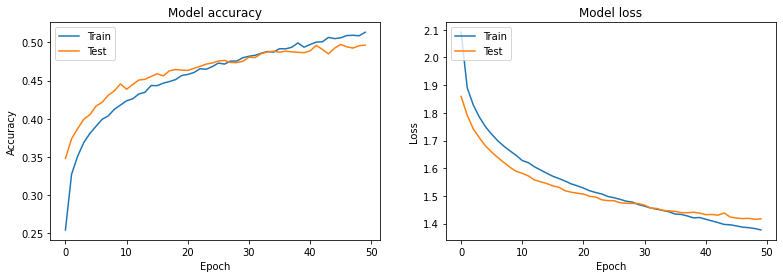

In [20]:
model10=Sequential()
model10.add(Dense(256,input_shape=(3072,),activation='relu'))
model10.add(Dense(128,activation='selu'))
model10.add(Dense(64,activation='selu'))
model10.add(Dropout(0.1))

model10.add(Dense(32,activation='selu'))
model10.add(Dropout(0.2))
model10.add(Dense(10,activation='softmax'))
adagrad=optimizers.Adagrad(lr=0.001)
model10.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy'])
model10_history=model10.fit(x_train,y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_test, y_test))
plot_history(model10_history, 'Simple NN with 500 batch size')

Model 11

Epoch 1/50
1000/1000 [==============================] - 5s 4ms/step - loss: 2.2873 - accuracy: 0.2213 - val_loss: 1.7628 - val_accuracy: 0.3700
Epoch 2/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8353 - accuracy: 0.3346 - val_loss: 1.7099 - val_accuracy: 0.3863
Epoch 3/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7568 - accuracy: 0.3650 - val_loss: 1.6833 - val_accuracy: 0.3914
Epoch 4/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7154 - accuracy: 0.3824 - val_loss: 1.6584 - val_accuracy: 0.4018
Epoch 5/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6878 - accuracy: 0.3914 - val_loss: 1.6283 - val_accuracy: 0.4126
Epoch 6/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6552 - accuracy: 0.4085 - val_loss: 1.6007 - val_accuracy: 0.4261
Epoch 7/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6231 - accuracy: 0.4177 - val_loss: 1.5982 - val_accuracy:

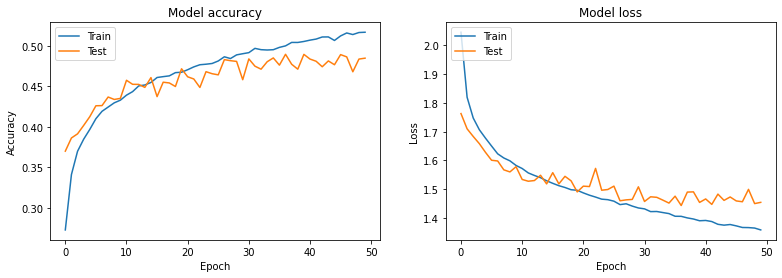

In [22]:
model11=Sequential()
model11.add(Dense(256,input_shape=(3072,),activation='relu'))
model11.add(Dense(128,activation='selu'))
model11.add(Dense(64,activation='selu'))
model11.add(Dropout(0.1))

model11.add(Dense(32,activation='selu'))
model11.add(Dropout(0.2))
model11.add(Dense(10,activation='softmax'))
adagrad=optimizers.Adam(lr=0.001)
model11.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy'])
model11_history=model11.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_test, y_test))
plot_history(model11_history, 'Simple NN with 500 batch size')

Model 12

Epoch 1/50
1667/1667 [==============================] - 8s 4ms/step - loss: 1.9864 - accuracy: 0.2861 - val_loss: 1.7649 - val_accuracy: 0.3754
Epoch 2/50
1667/1667 [==============================] - 7s 4ms/step - loss: 1.7220 - accuracy: 0.3926 - val_loss: 1.6928 - val_accuracy: 0.4020
Epoch 3/50
1667/1667 [==============================] - 7s 4ms/step - loss: 1.6627 - accuracy: 0.4124 - val_loss: 1.6268 - val_accuracy: 0.4220
Epoch 4/50
1667/1667 [==============================] - 7s 4ms/step - loss: 1.6073 - accuracy: 0.4340 - val_loss: 1.5968 - val_accuracy: 0.4320
Epoch 5/50
1667/1667 [==============================] - 7s 4ms/step - loss: 1.5757 - accuracy: 0.4449 - val_loss: 1.5735 - val_accuracy: 0.4404
Epoch 6/50
1667/1667 [==============================] - 7s 4ms/step - loss: 1.5562 - accuracy: 0.4548 - val_loss: 1.5726 - val_accuracy: 0.4399
Epoch 7/50
1667/1667 [==============================] - 7s 4ms/step - loss: 1.5240 - accuracy: 0.4652 - val_loss: 1.5562 - val_accuracy:

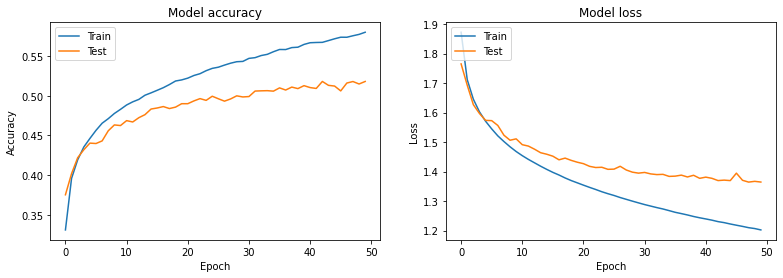

In [23]:
model12=Sequential()
model12.add(Dense(256,input_shape=(3072,),activation='relu'))
model12.add(Dense(128,activation='selu'))
model12.add(Dense(64,activation='selu'))
model12.add(Dense(32,activation='selu'))
model12.add(Dense(10,activation='softmax'))
adagrad=optimizers.Adagrad(lr=0.001)
model12.compile(optimizer=adagrad,loss='categorical_crossentropy',metrics=['accuracy'])
model12_history=model12.fit(x_train,y_train,batch_size=30,epochs=50,verbose=1,validation_data=(x_test, y_test))
plot_history(model12_history, 'Simple NN with 500 batch size')

Final Model

Epoch 1/50
500/500 [==============================] - 3s 5ms/step - loss: 2.0535 - accuracy: 0.2494 - val_loss: 1.7798 - val_accuracy: 0.3642
Epoch 2/50
500/500 [==============================] - 3s 5ms/step - loss: 1.7414 - accuracy: 0.3817 - val_loss: 1.6694 - val_accuracy: 0.4042
Epoch 3/50
500/500 [==============================] - 3s 5ms/step - loss: 1.6407 - accuracy: 0.4114 - val_loss: 1.5930 - val_accuracy: 0.4342
Epoch 4/50
500/500 [==============================] - 3s 5ms/step - loss: 1.5761 - accuracy: 0.4410 - val_loss: 1.5238 - val_accuracy: 0.4555
Epoch 5/50
500/500 [==============================] - 3s 5ms/step - loss: 1.5246 - accuracy: 0.4561 - val_loss: 1.5081 - val_accuracy: 0.4591
Epoch 6/50
500/500 [==============================] - 3s 5ms/step - loss: 1.4829 - accuracy: 0.4731 - val_loss: 1.4845 - val_accuracy: 0.4666
Epoch 7/50
500/500 [==============================] - 3s 5ms/step - loss: 1.4565 - accuracy: 0.4762 - val_loss: 1.4625 - val_accuracy: 0.4739
Epoch 

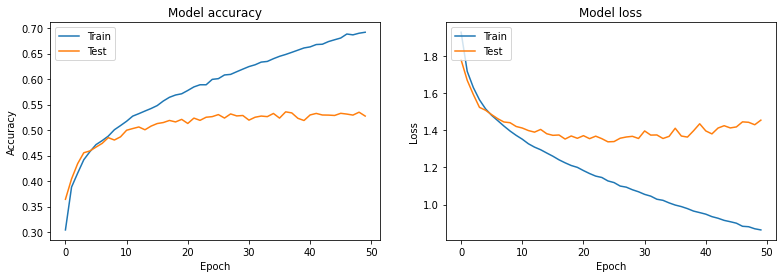

In [24]:
model13=Sequential()
model13.add(Dense(256,input_shape=(3072,),activation='relu'))
model13.add(Dense(128,activation='selu'))
model13.add(Dense(64,activation='relu'))
model13.add(Dense(64,activation='selu'))
model13.add(Dense(32,activation='relu'))
model13.add(Dense(32,activation='selu'))
model13.add(Dense(10,activation='softmax'))
adam=optimizers.Adam(lr=0.0001)
model13.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model13_history=model13.fit(x_train,y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_test, y_test))
plot_history(model13_history, 'Simple NN with 500 batch size')

Observations

By adding dropouts and batch normalization by model accuracy been reduced.

In [61]:
train_accuracies=[model1_history.history['accuracy'][-1],model2_history.history['accuracy'][-1],model3_history.history['accuracy'][-1],
    model4_history.history['accuracy'][-1],model5_history.history['accuracy'][-1],model6_history.history['accuracy'][-1],
    model7_history.history['accuracy'][-1],model8_history.history['accuracy'][-1],model9_history.history['accuracy'][-1],
    model10_history.history['accuracy'][-1],model11_history.history['accuracy'][-1],model12_history.history['accuracy'][-1],model13_history.history['accuracy'][-1]]
test_accuracies=[model1_history.history['val_accuracy'][-1],model2_history.history['val_accuracy'][-1],model3_history.history['val_accuracy'][-1],
                 model4_history.history['val_accuracy'][-1],model5_history.history['val_accuracy'][-1],model6_history.history['val_accuracy'][-1],
                 model7_history.history['val_accuracy'][-1],model8_history.history['val_accuracy'][-1],model9_history.history['val_accuracy'][-1],
                 model10_history.history['val_accuracy'][-1],model11_history.history['val_accuracy'][-1],model12_history.history['val_accuracy'][-1],
                 model13_history.history['val_accuracy'][-1]]
  

In [72]:
data=pd.DataFrame({'Train Accuracy':train_accuracies,
                  'Test Accuracy':test_accuracies})


Accuracies for models

In [73]:
data

,Train Accuracy,Test Accuracy
0,0.15636,0.1585
1,0.48772,0.4798
2,0.43012,0.4471
3,0.37540,0.3679
4,0.66032,0.5129
5,0.51610,0.4859
6,0.53470,0.4968
7,0.66054,0.5125
8,0.41218,0.4037
9,0.51332,0.4964


Best accuracy

In [76]:
print("Best Train accuracy",max(train_accuracies))
print("Best test accuray for best train accuracy ",test_accuracies[train_accuracies.index(max(train_accuracies))])




Best Train accuracy 0.6919999718666077
Best test accuray for best train accuracy  0.5274999737739563


Conclusion
 
Here I used relu and selu activation functions alternatively and my optimizer is adam with learning rate 0.0001.I don't use any dropouts and batch normalization here why because it leads over fitting for my models.

Predictions

In [91]:
y_pred=model13.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


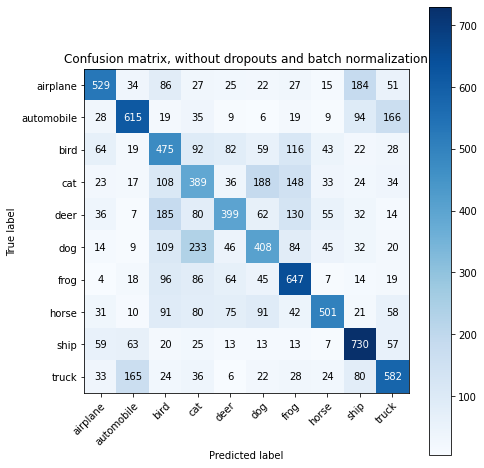

In [97]:
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without dropouts and batch normalization')